# Homework 1 - Computational Physics 2

- Submission deadline: **Friday 27th January 2023 (by the end of the day).**


- When you finish the assignment, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- You may work on this homework individually or in pairs. Submitted assignments should have maximum 2 authors.


- You can call your notebook with your surname/s, e.g. hw1_names.ipynb, and also include your name/s in the notebook.


- Within a single python notebook, add the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from PIL import Image
import random

## Problem 1 (10 points): Quantum Harmonic Oscillator

The Schrödinger equation for the quantum harmonic oscillator is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi=E\psi$$

It can be rewritten, in terms of a new variable, $\xi\equiv\frac{2E}{\hbar\omega}$, as follows:

$$\frac{d^2\psi}{d\xi^2}=\left(\xi^2 -K\right)\psi$$

where $K\equiv\frac{2E}{\hbar\omega}$ is the energy in units of $\frac{1}{2}\hbar\omega$.


(a) Find the **ground state energy** of the harmonic oscillator, to five significant digits, by using **the shooting method**. That is, solve the above equation numerically, varying $K$ until you get a wave function that goes to zero at large $\xi$. The appropriate boundary conditions for the ground state (and any even state) are $\psi(0) = 1$, $\psi'(0) = 0$.

First we are going to convert the second order ODE into a 1st order ODE

We are going to consider the following change of variables:

$$\psi'(\xi) = v(\xi)$$

which gives us

$$v'(\xi) = (\xi^{2} - K) \psi(\xi)$$

resulting in the following matrix (system of ODEs) 

$$\frac{dS(\xi)}{d\xi} = \left[\begin{array}{cc}
0 & 1 \\
\xi^{2} - K & 0
\end{array}\right]S(\xi)$$

where $S(\xi) = \left[\begin{array}{c} \psi(\xi) \\ v(\xi) \end{array}\right]$






In [2]:
# 1st order ODE:

F = lambda xi, s: np.dot(np.array([[0,1],[xi**2 - K, 0 ]]), s)

In [41]:
# Axis:

h_1 = 0.01
x_1 = np.arange(0, 10 + h_1, h_1)

# Initial conditions

psi_00 = 1
Dpsi_00 = 0

# Assumption for K

K = 0.99995

#Shooting method

new_sol = solve_ivp(F, [0, 10], [psi_00, Dpsi_00,], t_eval = x_1)

In [42]:
# Root finding function
#def objective(v_00):
#    sol = solve_ivp(F, [0, 10], [psi_00, v_00], t_eval = x_1)
#    f = sol.y[0]
#    return f[-1] - Dpsi_00
# Optimisation:
#new_v00 = fsolve(objective, 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


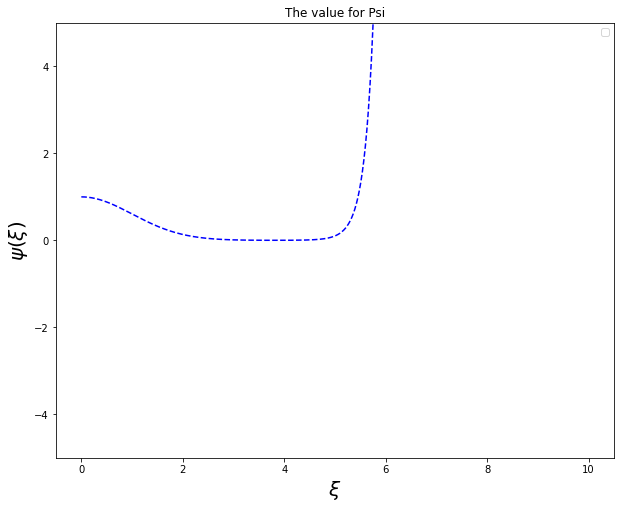

In [43]:
# Plotting

plt.figure(figsize = (10, 8))
plt.plot(new_sol.t, new_sol.y[0], "b", linestyle="--")
plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi(\xi)$', size= 20)
plt.ylim(-5,5)
plt.title(f'The value for Psi')

plt.legend()
plt.show()

(b) Make a few illustrative panels showing plots of the wave function for different values of $K$ as it converges to the solution. What does the tail of the wave function does when the values are slightly above or below the correct solution?

(c) Find the **first three excited state energies** (to five significant digits) for the harmonic oscillator, using **the shooting method**. For the first (and third) excited state you will need to set $\psi(0) = 0$, $\psi'(0) = 1$.)

(d) Make a few illustrative panels showing plots of the wave functions for different values of $K$ as they converge to their respective solutions.

(e) Make a single plot showing the **harmonic potential** joinly with the **energy ladder** of the quantum harmonic oscillator (include the ground state plus the first three excited states that you calculated above, each with their **respective wave functions**). Consider the particle to be an electron and choose appropriate units for any physical parameters you may need.

## Problem 2 (10 points): Thermodynamics and Heat Conduction

Use appropriate numerical algorithms to study how the temperature profile in a heated metal wire evolves in time, under different initial and boundary conditions. For this, you need to solve the 1D heat equation:

$$\frac{\partial T}{\partial t}=\alpha\frac{\partial^2 T}{\partial x^2}$$

where $T=T(x, t)$ describes the temperature of the metal, $x$ is position, $t$ is time, and $\alpha$ is the thermal diffusivity of the metal. We will consider two metals as I explain below.

Assume that the metal wire has a length of $20\,\rm cm$, and choose the wire midpoint as the origin for the problem.

The initial temperature profile in degrees Celsius is given by the following function:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2$$

where $x$ is in units of $\rm cm$. 



(a) Imagine we keep the temperatures at the edges of the metal wire fixed at a temperature of $25\,\rm C$. Construct a Crank-Nicolson algorithm to simulate the evolution of the temperature profile and find the time in seconds at which thermal equilibrium is reached in two metal wires (one made of Copper with $\alpha=111\,\rm \frac{mm^2}{s}$ and one made of Molybdenum with $\alpha=54.3\,\rm \frac{mm^2}{s}$ ).

In [140]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 , 10 + h, h)

t = np.arange(0, 400 + k, k)

# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=25)

# Initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2

In [141]:
# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.zeros((n,m)) #Copper
T2 = np.zeros((n,m)) #Molybdenum

# Add the ics

T1[:, 0] = ics
T2[:, 0] = ics

# Add the bc

T1[0, :] = bcs[0]
T1[-1, :] = bcs[1]

T2[0, :] = bcs[0]
T2[-1, :] = bcs[1]

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11
alphamb = 0.543

r_factor1 = alphacu * k / h**2

r_factor2 = alphamb * k / h**2

(401, 401)


### Copper

In [142]:
# First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor1]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor1]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor1]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

# Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor1]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor1]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor1]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [143]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T1[1:-1, j].copy()

    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor1*(T1[0, j+1] + T1[0, j])
    b[-1] = b[-1] + r_factor1*(T1[-1, j+1] + T1[-1, j])
    
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T1[1:-1, j+1] = sln_b

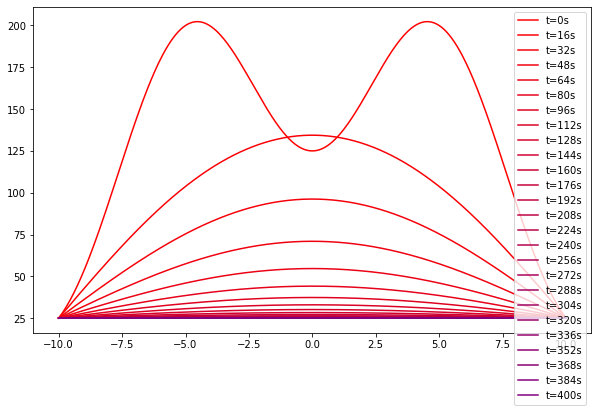

In [144]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))

for j in range(0, (m+1)//2, 8):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
plt.legend(fontsize=10)
plt.show()


### Molybdenum 

In [145]:
#First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor2]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor2]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor2]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

#Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor2]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor2]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor2]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [146]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T2[1:-1, j].copy()
    #print(b.shape)
    #print(b)
    
    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor2*(T2[0, j+1] + T2[0, j])
    b[-1] = b[-1] + r_factor2*(T2[-1, j+1] + T2[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T2[1:-1, j+1] = sln_b

In [68]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))


for j in range(0, (m+1)//2, 10):
    plt.plot(x, T2[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
    
plt.legend(fontsize=10)
plt.show()


NameError: name 'T2' is not defined

<Figure size 720x432 with 0 Axes>

(b) Can we use explicit or FFT methods to solve the problem described in literal (a)? Explain.

(c) Make a labeled animation showing six panels (with 2 columns and three rows): the top two panels should show the time evolution of the 1D temperature profile of each metal wire, the medium two panels how the temperature surface is built up in time, and the bottom two panels the surface projection onto the $x$-$t$ plane.

In [154]:
x_grid, t_grid = np.meshgrid(x, t)

# Colors
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0
    
for j in range(0, (m+1)//2, 3):
    
    fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(20,12))
    
    ax1.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]])
    
    ax2.plot(x, T2[:, 2*j] , color = [R[j], G, B[j]])
    
    ax1.set_ylim([0, 210])
    
    ax2.set_ylim([0, 210])
    
    ax3.plot(t, T1[2*j, :] , color = [R[j], G, B[j]])
    
    ax4.plot(t, T2[2*j, :] , color = [R[j], G, B[j]])
    
    ax3.set_ylim([0, 210])
    
    ax4.set_ylim([0, 210])

    ax5.pcolor(x_grid, t_grid, T1.T, cmap = 'bwr')

    ax6.pcolor(x_grid, t_grid, T2.T, cmap = 'bwr')
    
    plt.savefig("./wave1D{:03d}.png".format(j))
    
    plt.close()
    

In [155]:
images_in = "./wave****.png"

gif_image_out = "./animation_wave.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

(d) Re-study heat diffusion only in the Copper wire, but this time add some noise $f(x)$ with amplitude $\beta$ to the initial condition:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2 + \beta\,f(x)\,g(x)$$

Note that you need to find an appropriate apodization function $g(x)$ so that the initial boundary conditions remain fixed at $25\,\rm C$. Similarly, you should choice an amplitude for the noise function to be less than a thousandth of the peak temperature value.

In [70]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 + h, 10 + h, h)

t = np.arange(0, 75+ k, k)

# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.zeros((n,m)) #Copper

# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=25)

In [81]:
# New initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2 

# Adding noise with an amplitude of 0.2(Thousand of the peak temperature)

noise = [random.uniform(-.2, .2) for i in range(len(ics))]

# We are using the Hanning apodization function to mantain the edges at 25degrees

hann_window = np.hanning(len(ics))

ics = ics + hann_window*noise

# Add the ics

T1[:, 0] = ics

# Add the bc

T1[0, :] = bcs[0]
T1[-1, :] = bcs[1]

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11

r_factor1 = alphacu * k / h**2

In [82]:
# First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor1]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor1]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor1]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

# Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor1]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor1]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor1]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [83]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T1[1:-1, j].copy()

    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor1*(T1[0, j+1] + T1[0, j])
    b[-1] = b[-1] + r_factor1*(T1[-1, j+1] + T1[-1, j])
    
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T1[1:-1, j+1] = sln_b

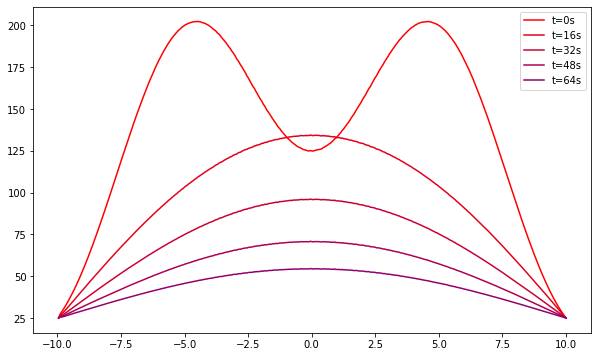

In [84]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))

for j in range(0, (m+1)//2, 8):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
plt.legend(fontsize=10)
plt.show()


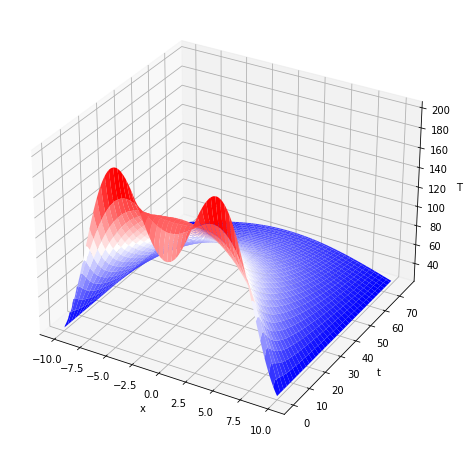

In [85]:
x_grid, t_grid = np.meshgrid(x, t)

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, T1.T, cmap='bwr') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel('T')

plt.show()

(e) Re-study heat diffusion only in the Copper wire for the original $T(x, 0)$, but this time assume that the boundaries cannot be kept constant (because of e.g. a faulty cooling system). Instead they also evolve in time according to the following functions:

$T(-10\,{\rm cm}, t) = 25 + t$

$T(+10\,{\rm cm}, t) = 25 + 0.5\,t$

where $T(x, t)$ is in degrees Celsius, and $t$ in seconds. Run the simulation until the temperature profile shows a linear trend.

In [159]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 + h, 10 + h, h)

t = np.arange(0, 75+ k, k)

# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.zeros((n,m)) #Copper

In [160]:
# Initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2

# Add the ics

T1[:, 0] = ics


# Adding the bcs to each column of the Temperature profile following the given equation:

for i in range(m):
    T1[0, i] = 25 + t[i]
    
    T1[-1, i] = 25 + 0.5*t[i]
    

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11

r_factor1 = alphacu * k / h**2

In [161]:
# First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor1]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor1]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor1]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

# Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor1]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor1]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor1]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [162]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T1[1:-1, j].copy()

    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor1*(T1[0, j+1] + T1[0, j])
    b[-1] = b[-1] + r_factor1*(T1[-1, j+1] + T1[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T1[1:-1, j+1] = sln_b

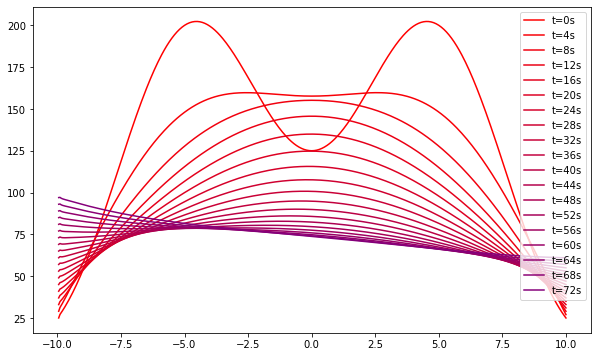

In [164]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))


for j in range(0, (m+1)//2, 2):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
    
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0


for j in range((m+1)//2):
    
    plt.figure(figsize=(10,6))
    
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]])
    
    plt.ylim(0,210)
    
    plt.savefig("./Tempco{:03d}.png".format(j))
    
    plt.close()

#plt.legend([f't={2*t_value.round(3)}' for t_value in t])



In [ ]:
images_in = "./Tempco***.png"

gif_image_out = "./animation_tempcu.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)